In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#Import datasets
from sklearn import datasets
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [3]:
f = pd.read_csv("D:/temp/black_friday_editado.csv")

In [4]:
f.head()
f = f.sample(5000)

In [5]:
df=f.drop(["usuario", "produto","sexo","idade","profissao","anos_cidade","cat_prod_1","cat_prod_3","estado_civil"], axis=1)
df.head()

,cidade,total_comprado,nova_idade
101675,B,15662,21
39766,C,8720,33
181677,B,10072,30
272206,A,4690,49
209506,B,359,29


In [6]:
x_train = df.drop('cidade',axis=1)
x_train.head()

,total_comprado,nova_idade
101675,15662,21
39766,8720,33
181677,10072,30
272206,4690,49
209506,359,29


In [7]:
from sklearn.cluster import KMeans
num_of_clusters = range(2,13)
error=[]

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    #clusters.fit(df_scld)
    clusters.fit(x_train)
    error.append(clusters.inertia_/100)
df = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term":error})
df

,Cluster_Numbers,Error_Term
0,2,3.551714e+08
1,3,1.746477e+08
2,4,1.037693e+08
3,5,6.021491e+07
4,6,3.707464e+07
5,7,2.619128e+07
6,8,1.918023e+07
7,9,1.491595e+07
8,10,1.091701e+07
9,11,8.977923e+06


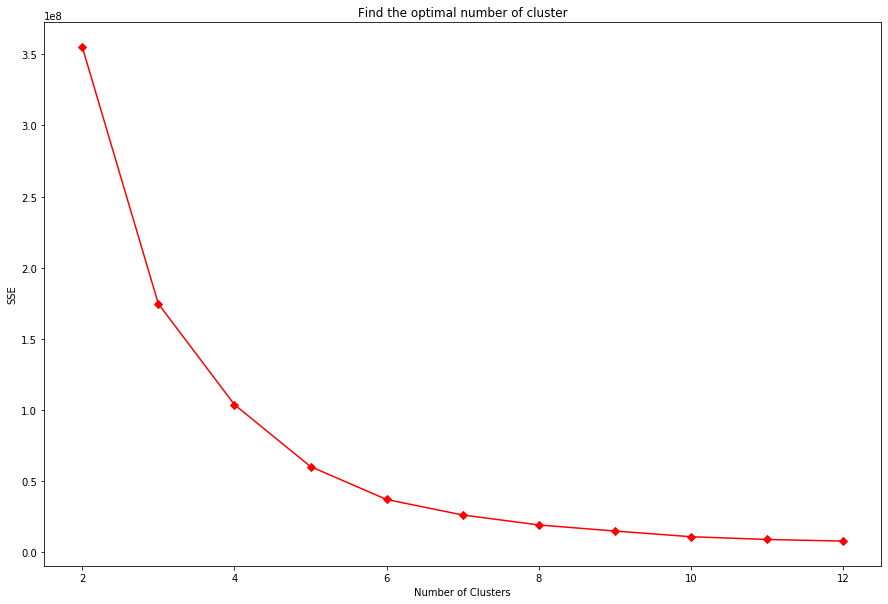

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()

In [9]:
clusters = KMeans(4)
clusters.fit(x_train)
clusters.labels_

array([1, 0, 3, ..., 0, 0, 1])

In [10]:
x_train['Cluster'] = clusters.labels_
print(x_train.head())
print(x_train['Cluster'])

        total_comprado  nova_idade  Cluster
101675           15662          21        1
39766             8720          33        0
181677           10072          30        3
272206            4690          49        2
209506             359          29        2
101675    1
39766     0
181677    3
272206    2
209506    2
255640    1
240259    0
53956     2
346876    0
302381    2
153423    0
226738    0
45824     1
445464    1
527637    0
514517    0
473618    2
413287    3
529947    1
349428    3
142821    0
402031    1
418522    1
215400    0
145821    3
140467    3
342652    0
322349    0
27045     0
50688     1
         ..
135188    2
409055    0
122275    3
94535     3
492035    0
288826    1
2577      0
429906    0
504700    3
416411    0
307064    2
500477    1
358226    0
54584     2
45399     1
467639    3
274319    1
139686    3
458469    2
499571    3
72515     3
481778    0
336367    3
55653     2
382219    0
369242    3
461845    0
377834    0
335652    0
182052    1
Name

In [11]:
x_train.groupby("Cluster").size()

Cluster
0    2123
1    1057
2     840
3     980
dtype: int64

In [12]:
clust_profile = pd.pivot_table(x_train, values=['total_comprado','nova_idade'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)

,nova_idade,total_comprado
Cluster,,
0,34.59,7085.67
1,34.43,17365.15
2,34.11,3030.79
3,34.82,11236.46


média por grupo

In [13]:
kmeans = KMeans(n_clusters = 4, max_iter = 5, random_state = 5)
y_kmeans = kmeans.fit_predict(x_train)
print(y_kmeans)
print(kmeans.n_iter_)

[1 0 3 ... 0 2 1]
4


In [14]:
x_train_arr = x_train.values
print(x_train_arr)

[[15662    21     1]
 [ 8720    33     0]
 [10072    30     3]
 ...
 [ 6887    46     0]
 [ 5393    31     0]
 [16019    42     1]]


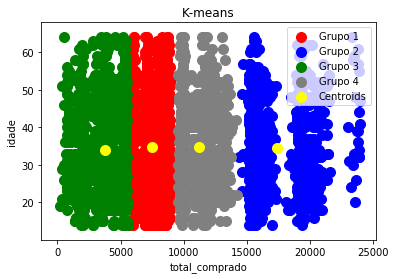

In [15]:
plt.scatter(x_train_arr[y_kmeans == 0, 0], x_train_arr[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(x_train_arr[y_kmeans == 1, 0], x_train_arr[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(x_train_arr[y_kmeans == 2, 0], x_train_arr[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(x_train_arr[y_kmeans == 3, 0], x_train_arr[y_kmeans == 3, 1], s = 100, c = 'gray', label = 'Grupo 4')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("total_comprado")
plt.ylabel("idade")
plt.title("K-means")

plt.legend()
plt.show()